# Statistics size detection
@author: Max Felius

In [1]:
#imports
import numpy as np
import pandas as pd
import geopandas as gpd
import sys, os, time
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point
from scipy import spatial

# import personal functions 
sys.path.extend(os.path.join(os.getcwd(),'sinkhole_functions'))
from sinkhole_functions.functions import * 
from sinkhole_functions.geometric_models import *
from sinkhole_functions.detectability_map import *

In [2]:
folder = ''
filename = 'Detectability_Map_Posting1m_Franciscanerstraat.csv'

dataset_filename = os.path.join(folder,filename)

data = pd.read_csv(dataset_filename,index_col=0)
# geo_data = gpd.GeoDataFrame(data.drop(['geometry'],axis=1),crs={'init':'epsg:4326'},geometry=[Point(xy) for xy in zip(data.pnt_lon, data.pnt_lat)])

# #other crs
# geo_data = geo_data.to_crs('epsg:28992')

# rdx = geo_data.geometry.x.values
# rdy = geo_data.geometry.y.values

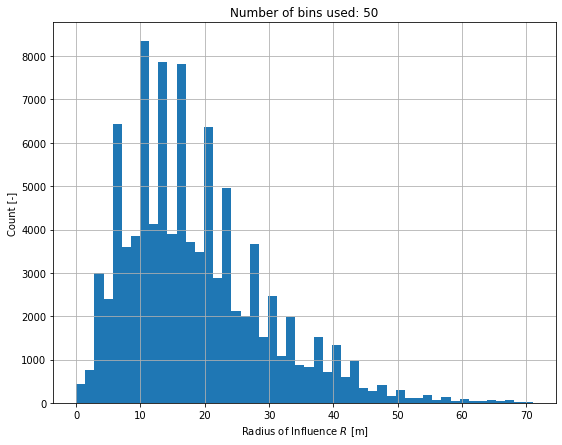

In [3]:
size = np.abs(data['Sum']-100)

plt.figure(figsize=(9,7))
plt.hist(size,bins=50)
plt.title('Number of bins used: 50')
plt.ylabel('Count [-]')
plt.xlabel('Radius of Influence $R$ [m]')
plt.grid(True);

# plt.savefig('Statistics_MDS.png')

In [6]:
R_max = 35
total = len(data['Sum'])
numb_sinks_le20 = np.sum(abs(data['Sum']-100) <= R_max)
                         
print('Total number of postings is: {}. Where {} are {} meters or smaller and this is {:.0f}%'.format(total,numb_sinks_le20,R_max,(numb_sinks_le20/total *100)))                        

Total number of postings is: 98141. Where 89605 are 35 meters of smaller and this is 91%
